# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


**1. What are you being asked to do?**  
Stakeholders at TikTok has asked us to create a machine learning model to determine if videos violate terms of service. Since there could be thousands or millions of videos created each day, manually reviewing such videos would be too resource intense.

Our previous analysis indicated that TikTok users who have been banned (violated term of service) are more likely to post a `claim` than an `opinion`.

We are asked to build a model that determines if a video is a `claim` or `opinion`. If a video is flagged as `claim`, it would go into further processing. We could use the top X percentage of times a video was reported as a way to determine if it needs to be manually reviewed sooner rather than later.

**What metric should I use to evaluate success of my business/organizational objective?**  
The dataset that we will be working on has a binary variable column named `claim_status` which is either `claim` or `opinion`. We will use `claim_status` as the target variable. This will be a classification task since the model is predicting a binary class.

We will use F1, precision, recall and accuracy scores to evaluate the success of the model. A confusion matrix will be created to show:
- True Positives: the model predicted a `claim` and it truly was a `claim`
- True Negatives: the model predicted an `opinion` and it truly was an `opinion`
- False Positives: the model predicted a `claim` when it was an `opinion`
- False Negatives: the model predicted an `opinion` when it was a `claim`

**2. What are the ethical implications of the model?**  
If the model makes a prediction mistake, it's better to be a False Positive than False Negative. We want to catch videos that break the terms of service so predicting a False Negative means the video went through and not flagged for further processing. 

**What are the consequences of your model making errors?**  
If a video was a False Positive, then it would have been flagged for further processing. If a video was a False Negative, it would have gone through and violate terms of service. We want to minimize the latter.

Since it is more important to minimize False Negatives, we will use **recall** as our main evaluation metric.

**3. How would you proceed?**  
We will need to do the following on the dataset:
- load it
- perform exploratory data analysis, clean/modify/transform
- split the data into training, validating, and testing sets
- build, fit, and tune hyperparameters on training set
- run validation set on best model
- run test set and evaluate performance

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Import packages for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# Import packages for data modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
df = pd.read_csv('tiktok_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
df.head(10)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
df.shape


(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
df.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats

df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Find number of unique value(s) in each column
df.nunique()


#                           19382
claim_status                    2
video_id                    19382
video_duration_sec             56
video_transcription_text    19012
verified_status                 2
author_ban_status               3
video_view_count            15632
video_like_count            12224
video_share_count            9231
video_download_count         4336
video_comment_count          2424
dtype: int64

In [9]:
# Check for missing values

df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

The number of rows with missing data is negligible compared to the dataset, thus dropping them is okay.

In [10]:
# Drop rows with missing values
df = df.dropna(axis=0)


In [11]:
# Display first few rows after handling missing values

df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Check for and handle duplicates.

In [12]:
# Check for duplicates

df.duplicated().sum()

0

Check for and handle outliers.

In [13]:
# Tree models do not require handling of outliers


Check class balance.

In [14]:
# Check class balance
df['claim_status'].value_counts()


claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [15]:
# Check class balance by proportion

df['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

The `claim_status` class proprotion is very balanced at 50.3% `claim` and 49.7% `opinion`.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [16]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df.loc[:, 'text_length'] = df['video_transcription_text'].str.len()
df.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [17]:
# Calculate the average text_length for claims and opinions
df[['claim_status','text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

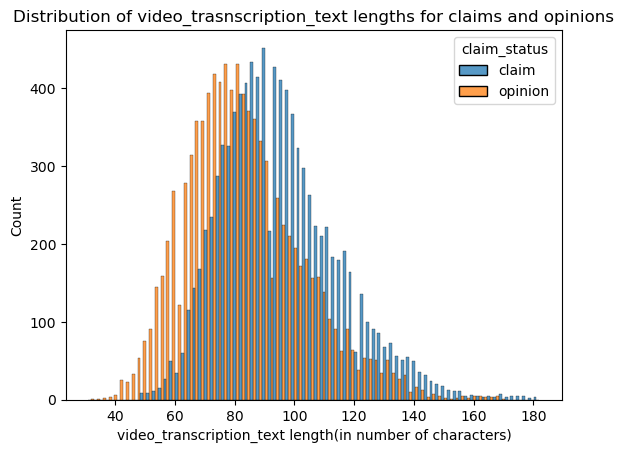

In [18]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
sns.histplot(data=df , x='text_length',stat='count', hue='claim_status', multiple='dodge',kde=False,element='bars',)
plt.title('Distribution of video_trasnscription_text lengths for claims and opinions')
plt.xlabel('video_transcription_text length(in number of characters)')
plt.ylabel('Count')
plt.show()



The `video_transcription_text_length` for `claim` is on average more than `opinion` videos,about 13 more on average, as indicated in a previous cell. The distribution for both are normal with some skew to the right.

**Feature selection and transformation**

Encode target and catgorical variables.

In [19]:
# Create a copy of the X data
X = df.copy()

# Drop unnecessary columns
X = X.drop(['#','video_id'],axis=1)

# Encode target variable
X['claim_status'] = X['claim_status'].map({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
X= pd.get_dummies(X, 
                  columns=['verified_status','author_ban_status'],
                  drop_first=True)
X.head()


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [20]:
# Isolate target variable
y = X['claim_status']


Isolate the features.

In [21]:
# Isolate features
X = X.drop(['claim_status'],axis=1)

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [22]:
# Split the data into training and testing sets
x_tr , x_test , y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [23]:
# Split the training data into training and validation sets

x_train , x_val , y_train, y_val = train_test_split(x_tr, y_tr, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [24]:
# Get shape of each training, validation, and testing set
x_test.shape ,  y_test.shape, x_train.shape , x_val.shape , y_train.shape, y_val.shape 

((3817, 11), (3817,), (11450, 11), (3817, 11), (11450,), (3817,))

- The number of features (`11`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`11,450`) and both validation and testing data (`3,817`).

In [25]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2,3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [26]:
# Extract numerical features from `video_transcription_text` in the training set
count_num_feat = count_vec.fit_transform(x_train['video_transcription_text']).toarray()
count_num_feat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_num_feat, columns=count_vec.get_feature_names_out())
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
x_train_final = pd.concat([x_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df],axis=1)
x_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Extract numerical features from `video_transcription_text` in the testing set
count_num_val = count_vec.transform(x_val['video_transcription_text']).toarray()
count_num_val

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
count_val_df = pd.DataFrame(data=count_num_val, columns=count_vec.get_feature_names_out())
count_val_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([x_val.drop(columns=['video_transcription_text']).reset_index(drop=True), count_val_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,72,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,96,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,88,False,False,False,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,83,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,104,False,False,True,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_df = count_vec.transform(x_test['video_transcription_text']).toarray()
# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_df, columns=count_vec.get_feature_names_out())
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
x_test_final = pd.concat([x_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df],axis=1)

x_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,False,False,False,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,True,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,90,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [33]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scr = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scr, cv=5, refit='recall')

In [ ]:
%%time

# rf_cv.fit(x_train_final, y_train)

CPU times: total: 5min 8s
Wall time: 5min 10s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [35]:
# Examine best recall score

rf_cv.best_score_

0.9948228253467271

In [36]:
# Examine best parameters

rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

**Question:** How well is your model performing? Consider average recall score and precision score.  
This model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

### **Build an XGBoost model**

In [37]:
# Instantiate the random forest classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scr = ['accuracy','precision','recall','f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scr, cv=5, refit='recall')


In [ ]:
%%time
# Fit model with training set



# xgb_cv.fit(x_train_final, y_train)

CPU times: total: 7min 33s
Wall time: 43.8 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [39]:
# Examine best recall score

xgb_cv.best_score_

0.9898176171763818

In [40]:
# Examine best parameters

xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

**Question:** How well does your model perform? Consider recall score and precision score.  

This model also performs exceptionally well. Although, its recall score is very slightly lower than the random forest model's

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [41]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
pred_y = rf_cv.best_estimator_.predict(X_val_final)

Display the predictions on the encoded testing set.

In [42]:
# Display the predictions on the encoded testing set
pred_y

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

Display the true labels of the testing set.

In [43]:
# Display the true labels of the testing set
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

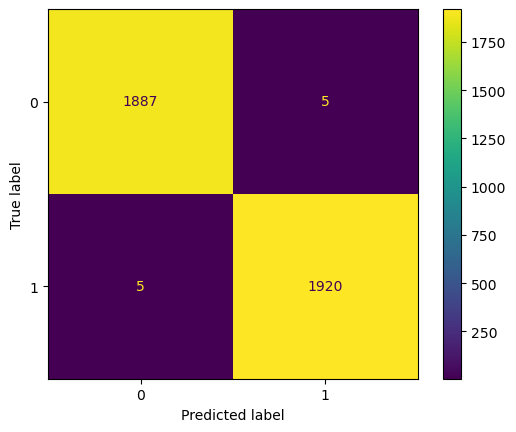

In [44]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm_rf = confusion_matrix(y_val,pred_y, labels=rf_cv.classes_)

# Create display of confusion matrix
disp_cm_rf = ConfusionMatrixDisplay(cm_rf, display_labels=rf_cv.classes_)

# Plot confusion matrix
disp_cm_rf.plot()
plt.show()

- The upper-left quadrant displays the number of True Negatives: the number of opinions that the model accurately classified as so.

- The upper-right quadrant displays the number of False Positives: the number of opinions that the model misclassified as claims.

- The lower-left quadrant displays the number of False Negatives: the number of claims that the model misclassified as opinions.

- The lower-right quadrant displays the number of True Positives: the number of claims that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

As the above confusion matrix shows, this model does not produce too much false negatives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [45]:
# Create a classification report
# Create classification report for random forest model
target_labels=['opinion','claim']
print(classification_report(y_val,pred_y,target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?  
The classification report above shows that the random forest model scores were nearly perfect. The confusion matrix indicates that there were 10 misclassifications&mdash;five false postivee and five false negatives.

#### **XGBoost**

In [46]:
#Evaluate XGBoost model
pred_y = xgb_cv.best_estimator_.predict(X_val_final)
pred_y

array([1, 0, 1, ..., 1, 1, 1])

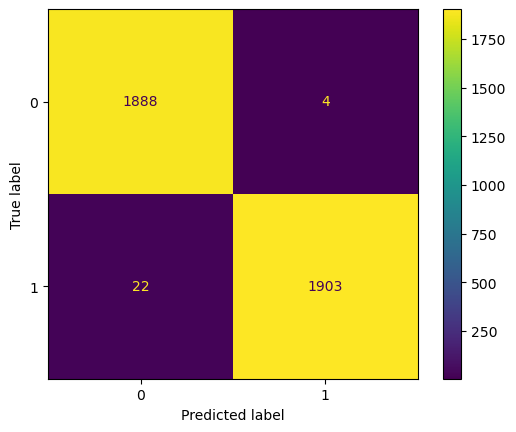

In [47]:
# Display confusion matrix plot

# Compute values for confusion matrix
cm_xgb= confusion_matrix(y_val,pred_y, labels=xgb_cv.classes_)

# Create display of confusion matrix
disp_cm_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels=xgb_cv.classes_)

# Plot confusion matrix
disp_cm_xgb.plot()
plt.show()

In [48]:
# Create a classification report
# target_labels defined in Random Forest classification_report() cell

print(classification_report(y_val,pred_y, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model? 
 
The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

### **Use champion model to predict on test data**

In [49]:
# Random Forest is the champion model so we will use that on the test data

y_pred = rf_cv.best_estimator_.predict(x_test_final)
y_pred


array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

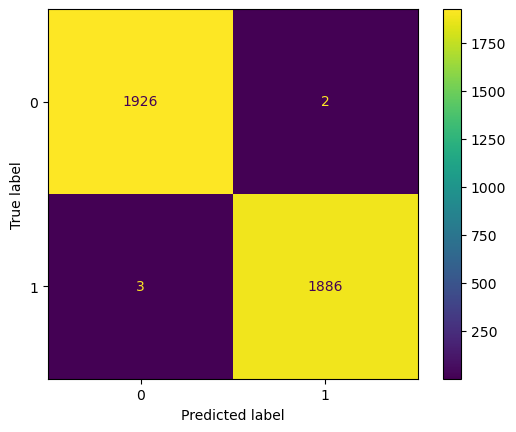

In [50]:
# Display confusion matrix plot

# Compute values for confusion matrix
cm= confusion_matrix(y_test,y_pred, labels=rf_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
disp.plot()
plt.show()

#### **Feature importances of champion model**

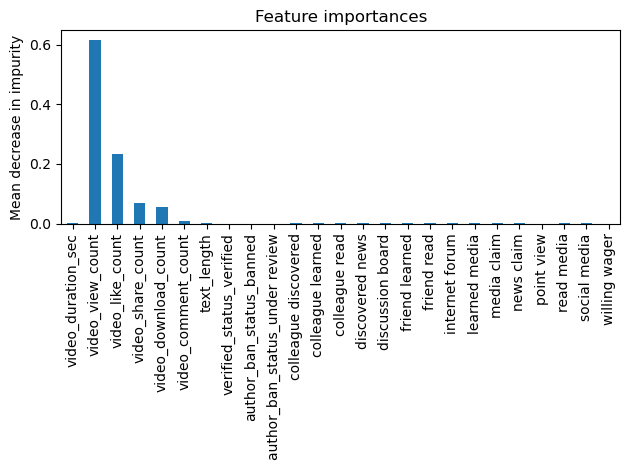

In [51]:
importances = rf_cv.best_estimator_.feature_importances_
importances_df = pd.DataFrame(importances, index=x_test_final.columns)

fig,ax = plt.subplots()
importances_df.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
ax.legend().set_visible(False)
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?  
The by far most predictive feature is `video_view_count`. Other features of note are `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`. All these relate to engagement levels as found in prior exploratory data analysis so the results were not surprising.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


**1. Would you recommend using this model? Why or why not?**  
Yes, I would recommend the champion model, Random Forest, because it performed well on both the validating and testing data. The F1, precision, recall, and accuracy scores were all nearly perfect.

**2. What was your model doing? Can you explain how it was making predictions?**  
The Random Forest model's predictions were mostly based on engagement features like `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`. The higher the counts were for those variables, the more likely they were predicted as `claim` videos.

**3. Are there new features that you can engineer that might improve model performance?**
I can go back and try tuning the hyperparameters with numbers range that is close to the best parameters. This process might make an improvement but the model is already at 99%.

**4. What features would you want to have that would likely improve the performance of your model?**
The number of times a video was reported should help improve the model. The number of videos from the author who was reported and the total amount of reports could also help improve performance.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

In [52]:
import pickle
# pickle.dump(xgb_cv,open('xgb_cv.sav','wb'))

In [53]:
# pickle.dump(rf_cv,open('rf_cv.sav','wb'))